In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib

In [2]:
data = pd.read_csv('country.csv')
data.sample(5)

,Country,Better transport and roads,Support for people who can't work,Access to clean water and sanitation,Better healthcare,A good education,A responsive government we can trust,Phone and internet access,Reliable energy at home,Affordable and nutritious food,Protecting forests rivers and oceans,Protection against crime and violence,Political freedoms,Freedom from discrimination and persecution,Equality between men and women,Better job opportunities
166,Switzerland,0.011145,0.025206,0.098165,0.063443,0.123800,0.085905,0.017833,0.017747,0.078189,0.082133,0.067558,0.058042,0.080847,0.075617,0.038495
122,Nicaragua,0.033804,0.050292,0.056879,0.095830,0.121245,0.053942,0.073526,0.027407,0.080011,0.040871,0.086190,0.031856,0.047966,0.057257,0.116971
24,Brunei Darussalam,0.037223,0.045272,0.073441,0.086519,0.115694,0.083501,0.048290,0.040241,0.073441,0.069416,0.084507,0.032193,0.053320,0.042254,0.077465
145,Samoa,0.013384,0.055449,0.080306,0.108987,0.131931,0.066922,0.013384,0.019120,0.072658,0.057361,0.074570,0.026769,0.051625,0.080306,0.087954
84,Japan,0.030367,0.035301,0.083228,0.092143,0.118981,0.079879,0.024665,0.044171,0.071370,0.069334,0.088115,0.041274,0.066121,0.050190,0.060599


In [3]:
X = data.drop('Country', 1)
X = np.array(X) #making it nparray for use in next part

In [4]:
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

In [5]:
# Assign cluster clusters based on closest centroid
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

In [6]:
# Calculate new centroids based on each cluster's mean
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [7]:
# Calculate variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [9]:
k = 5
cluster_vars = []
loop = 0

centroids = [X[i+2] for i in range(k)]
clusters = assign_clusters(centroids, X)
initial_clusters = clusters

while True:
    centroids = calc_centroids(clusters, X)
    clusters = assign_clusters(centroids, X)
    cluster_var = np.mean(calc_centroid_variance(clusters, X))
    cluster_vars.append(cluster_var)
    if (initial_clusters == clusters):
        break
    else:
        cluster_difference = []
        for i in range(len(clusters)):
            if clusters[i] != initial_clusters[i]:
                cluster_difference.append(i)
        print(cluster_difference) # printing index where clusters varied from the old one
        initial_clusters = list(clusters)
    loop = loop + 1
    
print(loop) # printing loop count
print(cluster_vars) # printing final clusters

[10, 11, 15, 37, 44, 45, 52, 55, 56, 65, 73, 79, 81, 87, 88, 91, 92, 95, 97, 104, 123, 124, 126, 132, 137, 152, 154, 161, 169]
[7, 52, 66, 83, 89, 96, 101, 108, 110, 130, 134, 145, 175, 180, 186]
[25, 38, 49, 73, 100, 102, 116, 139, 141, 144, 159, 170, 177, 189]
[18, 28, 68, 73, 122, 130, 138, 163, 164]
[2, 4, 13, 33, 51, 56, 134, 143, 156, 172, 175, 183, 188, 193]
[0, 15, 36, 48, 53, 54, 69, 77, 86, 87, 92, 157, 167, 190]
[8, 20, 23, 27, 35, 140, 142, 148, 150, 159, 174]
[45, 46, 62, 70, 76, 79, 96, 107, 137, 179, 192]
[12, 26, 89, 111, 115, 126, 136, 151, 168, 176]
[3, 7, 22, 62, 84, 114, 181]
[2, 78, 91, 93, 106, 117, 157, 161, 169, 187, 192]
[10, 39, 149, 150, 158, 186, 193]
[6, 28, 83, 170, 173]
[26, 43, 77, 102, 116, 135, 155]
[74, 113, 129, 171]
[153, 160, 177]
[34, 81, 146, 172]
[85]
18
[0.10373329149579869, 0.10235828039294703, 0.10035606357480767, 0.09928179414648612, 0.09816898101286804, 0.09647376402095384, 0.09505445609689142, 0.09382859533778254, 0.09289879398691059, 0.09

In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10, init='k-means++',n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

For k: 5 , count of loops: 19
For k: 10 , count of loops: 13
For k: 15 , count of loops: 13
For k: 20 , count of loops: 8


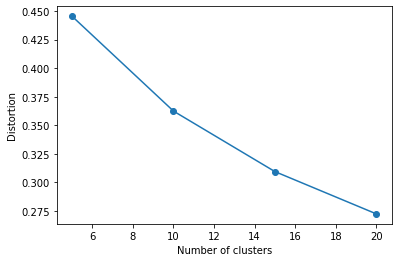

In [11]:
# calculate distortion for a range of number of cluster
k_s = [5, 10, 15, 20]

all_wcss = []
for k in k_s:
    km = KMeans(
        n_clusters=k, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    all_wcss.append(km.inertia_)
    print("For k:", k, ", count of loops:", km.n_iter_)

# plot
plt.plot(k_s, all_wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
# plt.show()
plt.savefig('scikit_discreet.eps', format='eps')